# Lab 3

## Reading CSV files

In [22]:
import pandas as pd

training_mice = pd.read_csv('./pw3_data/EEG_mouse_data_1.csv')
# training_mice2 = pd.read_csv('./pw3_data/EEG_mouse_data_2.csv')
testing_mice = pd.read_csv('./pw3_data/EEG_mouse_data_test.csv')



## Choosing features

In [31]:

feature_list = [
    "amplitude_around_1_Hertz",
    "amplitude_around_2_Hertz",
    "amplitude_around_3_Hertz",
    "amplitude_around_4_Hertz",
    "amplitude_around_5_Hertz",
    "amplitude_around_6_Hertz",
    "amplitude_around_7_Hertz",
    "amplitude_around_8_Hertz",
    "amplitude_around_9_Hertz",
    "amplitude_around_10_Hertz",
    "amplitude_around_11_Hertz",
    "amplitude_around_12_Hertz",
    "amplitude_around_13_Hertz",
    "amplitude_around_14_Hertz",
    "amplitude_around_15_Hertz",
    "amplitude_around_16_Hertz",
    "amplitude_around_17_Hertz",
    "amplitude_around_18_Hertz",
    "amplitude_around_19_Hertz",
    "amplitude_around_20_Hertz",
    "amplitude_around_21_Hertz",
    "amplitude_around_22_Hertz",
    "amplitude_around_23_Hertz",
    "amplitude_around_24_Hertz",
    "amplitude_around_25_Hertz",
]

input_training_mice = training_mice[feature_list]
output_training_mice = training_mice['state'].to_list()

#training_mice2 = training_mice2[feature_list]
#testing_mice = testing_mice[feature_list]
print(input_training_mice.head())
print(output_training_mice)

   amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0                  0.000009                  0.000014   
1                  0.000010                  0.000010   
2                  0.000011                  0.000077   
3                  0.000003                  0.000031   
4                  0.000010                  0.000011   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                  0.000013                  0.000014   
1                  0.000011                  0.000015   
2                  0.000034                  0.000019   
3                  0.000044                  0.000016   
4                  0.000012                  0.000017   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.000023                  0.000009   
1                  0.000022                  0.000017   
2                  0.000013                  0.000006   
3                  0.000007                  0.000006   
4                  0.000020  

## Normalize data

fit and transform all column except "state"  with StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
for column in input_training_mice:
    
    column_data = input_training_mice[column].to_frame()
    scaler.fit(column_data)
    input_training_mice[column] = scaler.transform(column_data)
        
for i,row in enumerate(output_training_mice):
    if row =='n':
        output_training_mice[i] = 0
    else:
        output_training_mice[i] = 1
    
   
print(input_training_mice.head())
print(output_training_mice)

C:\Users\Jarod\AppData\Local\Temp\ipykernel_27940\874179867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_training_mice[column] = scaler.transform(column_data)
C:\Users\Jarod\AppData\Local\Temp\ipykernel_27940\874179867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_training_mice[column] = scaler.transform(column_data)
C:\Users\Jarod\AppData\Local\Temp\ipykernel_27940\874179867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

   amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0                 -0.327947                 -0.077315   
1                 -0.308098                 -0.321495   
2                 -0.278126                  3.694203   
3                 -0.502563                  0.953377   
4                 -0.311206                 -0.234021   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                 -0.098345                  0.013140   
1                 -0.222925                  0.113253   
2                  1.387219                  0.370614   
3                  2.062970                  0.187826   
4                 -0.170328                  0.227147   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.892218                 -0.179646   
1                  0.812089                  0.632424   
2                  0.086868                 -0.512794   
3                 -0.477586                 -0.521958   
4                  0.637048  

## Create model and fold

In [36]:
import keras
from keras import layers
from sklearn.model_selection import KFold

keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

def create_model():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input(25),
      layers.Dense(5, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),
      loss="mse",
  )

  return mlp

mlp = create_model()
mlp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 130       
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [37]:
import numpy as np
history_list = []
trained_mlp = []

for i, (train_index, test_index) in enumerate(kf.split(input_training_mice)):
  # We need to create a new model everytime otherwise fit will continue previous training
 
  mlp = create_model()
  x_train, x_test = input_training_mice.iloc[train_index], input_training_mice.iloc[test_index]
  y_train, y_test = np.array(output_training_mice)[train_index],np.array(output_training_mice)[test_index]
  
  
  history = mlp.fit(
      x=x_train, y=y_train,
      validation_data=(x_test, y_test),
      epochs=200
  )

  history_list.append(history)
  trained_mlp.append(mlp)

Epoch 1/200
423/423 [==============================] - 5s 9ms/step - loss: 0.1007 - val_loss: 0.0813
Epoch 2/200
423/423 [==============================] - 4s 9ms/step - loss: 0.0673 - val_loss: 0.0711
Epoch 3/200
423/423 [==============================] - 4s 9ms/step - loss: 0.0658 - val_loss: 0.0624
Epoch 4/200
423/423 [==============================] - 4s 10ms/step - loss: 0.0625 - val_loss: 0.0628
Epoch 5/200
423/423 [==============================] - 4s 10ms/step - loss: 0.0648 - val_loss: 0.0599
Epoch 6/200
423/423 [==============================] - 4s 10ms/step - loss: 0.0581 - val_loss: 0.0609
Epoch 7/200
423/423 [==============================] - 3s 7ms/step - loss: 0.0600 - val_loss: 0.0559
Epoch 8/200
423/423 [==============================] - 3s 7ms/step - loss: 0.0565 - val_loss: 0.0599
Epoch 9/200
423/423 [==============================] - 3s 7ms/step - loss: 0.0540 - val_loss: 0.0562
Epoch 10/200
423/423 [==============================] - 4s 10ms/step - loss: 0.0533 - va

## Plot training history

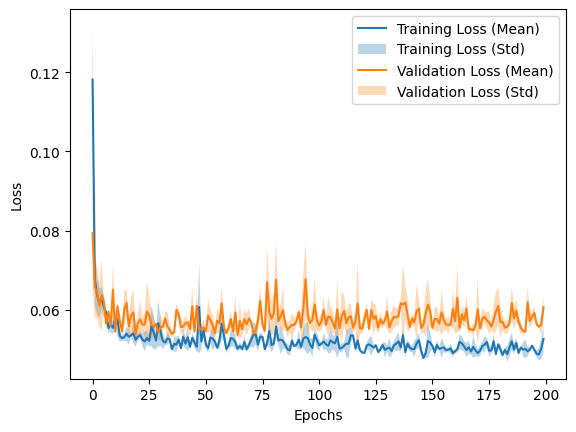

In [38]:
import matplotlib.pyplot as pl
%matplotlib inline

train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()